In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA8_082319_02.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA8_082319_02.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

# PeptideHits
for Peptide in peptide_id.getHits():
    print(" - Peptide hit sequence:", Peptide.getSequence())
    mz = Peptide.getSequence().getMonoWeight(Residue.ResidueType.Full, Peptide.getCharge()) / Peptide.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(Peptide.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
    filtered = MSExperiment()
for s in exp:
    if s.getMSLevel() == 2:
        filtered.addSpectrum(s)
def plotSpectrun(index):
    fig = plt.subplots(figsize =(5, 4))
    FirstSpectra = exp[index]
    mz, intensity = FirstSpectra.get_peaks()
    p = plt.bar(mz, intensity,snap=True,color ="r")
    plt.title("MS level :" + str(FirstSpectra.getMSLevel()))
    plt.ylabel('Intensity')
    plt.xlabel('m/z')
    plt.show()
plotSpectrun(2)



Peptide ID m/z: 494.571563720703
Peptide ID rt: 978.3177000000001
Peptide scan index: 2391
Peptide ID score type: hyperscore
Peptide ID m/z: 741.851257324219
Peptide ID rt: 1006.5268000000201
Peptide scan index: 2495
Peptide ID score type: hyperscore
Peptide ID m/z: 741.350952148438
Peptide ID rt: 1028.24959999998
Peptide scan index: 2570
Peptide ID score type: hyperscore
Peptide ID m/z: 695.384887695313
Peptide ID rt: 1293.7758000000001
Peptide scan index: 3471
Peptide ID score type: hyperscore
Peptide ID m/z: 742.350463867188
Peptide ID rt: 1446.6654
Peptide scan index: 4049
Peptide ID score type: hyperscore
Peptide ID m/z: 705.337707519531
Peptide ID rt: 1521.3897
Peptide scan index: 4341
Peptide ID score type: hyperscore
Peptide ID m/z: 740.85888671875
Peptide ID rt: 1724.5308
Peptide scan index: 5164
Peptide ID score type: hyperscore
Peptide ID m/z: 720.344970703125
Peptide ID rt: 1758.9779999999998
Peptide scan index: 5315
Peptide ID score type: hyperscore
Peptide ID m/z: 676.821

Number of matched peaks: 35
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y5++	2	312.17359170047104	312.2642822265625
b7++	2	345.66761908142104	345.2758483886719
b4+	1	389.1853190899711	389.2379150390625
b8++	2	410.188916193071	410.38861083984375
b5+	1	446.2067831856711	445.8095397949219
y8++	2	462.73728550352104	462.29022216796875
b9++	2	467.702388272821	467.39154052734375
y4+	1	510.25584258327103	510.5444030761719
b10++	2	511.218402852571	511.3983154296875
y9++	2	527.258582615171	527.0281372070312
b11++	2	560.752609996121	560.3515014648438
y10++	2	575.784964726821	575.3316650390625
b6+	1	593.2751974727711	593.3143310546875
b12++	2	617.294642171571	617.4403076171875
y5+	1	623.339906934171	623.5286254882812
y11++	2	649.3191718703711	649.3529052734375
y12++	2	677.829903918221	677.6015625
b13++	2	690.828849315121	690.598876953125
y6+	1	722.4083212212711	722.384521484375
y13++	2	728.353743529871	728.4654541015625
b14++	2	741.3526889267

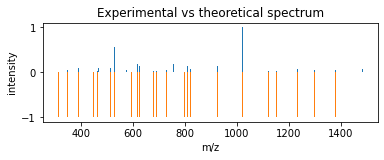

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
print(50*"-")


for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

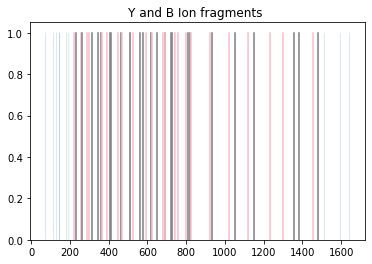

In [3]:
#y and b fragments
mz,i = spec1.get_peaks() 
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 200 and mz <= 1500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
          
            plt.plot([mz, mz], [0, i], snap=True, color="r")

            count = count + 1
        else:
            plt.plot([mz, mz], [0, i], snap=True, color="b")
                

            count = count + 1

plt.ylim(bottom=0)
plt.show()


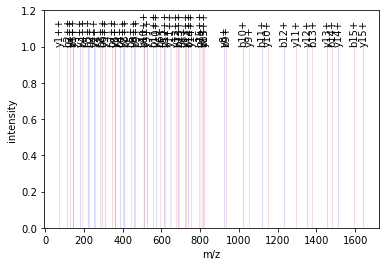

In [4]:
#can try another way
mz,i = spec1.get_peaks() 
annot = spec1.getStringDataArrays()[0] 
bars =plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False,color =("r","b"),)
count=0
for rect in bars: 
    height = rect.get_height() 
    if "y" in annot[count].decode():
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90, snap=True)
    else :
         plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[count].decode(), ha='center', va='bottom', rotation=90,snap=True) 
    idx += 1 
    count+=1
    plt.ylim(top=1.2) 
    plt.xlabel("m/z") 
    plt.ylabel("intensity")

In [2]:
#Proteolytic Digestion with Trypsin
from pyopenms import *
import matplotlib.pyplot as plt
import numpy as np
dig = ProteaseDigestion()
dig.getEnzymeName()
entries=[]
f=FASTAFile()
f.load("E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta",entries)
c=0
while c<len(entries)-1:
    f=AASequence.fromString(entries[c].sequence)
    print("sequence: ",c)
    result = []
    dig.digest(f, result)
    for e in result:
        print(e.toString())
    print(len(result)) 
    c=c+1
lis=[]
peptides=[AASequence.fromString(s.toString()) for s in result]
for peptide in peptides:
    tsg=TheoreticalSpectrumGenerator()
    spec1=MSSpectrum()
    p=Param()
    p.setValue("add_b_ions","true")
    p.setValue("add_y_ions","true")
    p.setValue("add_metainfo","true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1,peptide,1,1)
    lis.append(spec1)
    print("Spectrum 1 of",peptide,"has",lis[0].size(),"peaks")
  
  

sequence:  0
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEWLAVGGYGER
R
ERPAR
HGDR
VPHHR
HPER
R
GVR
AGGR
R
R
GHPR
AGPHDQQDEEHQR
RPDLQPLPAEPR
DGLR
LLPLR
HLPQR
LR
EPLPAR
HQQR
R
LHQHPHR
EVR
GR
R
R
AAR
ELQLPLR
GRPR
DR
R
LQGDGHR
LPR
GQR
DLHR
QDHPQQR
HR
GAPAPHGR
41
sequence:  1
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEMAR
CR
R
IWR
ATR
AACPPWR
SSAASPAP
10
sequence:  2
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSENGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYLLSHVMGYGFYHFGTYPSGYENPFLHAINNGGYTNTR
IEK
YEDGGVLHVSFSYR
YEAGR
VIGDFK
VMGTGFPEDSVIFTDK
IIR
SNATVEHLHPMGDNDLDGSFTR
TFSLR
DGGYYSSVVDSHMHFK
SAIHPSILQNGGPMFAFR
R
VEEDHSNTELGIVEYQHAFK
TPDADAGEE
22
sequence:  3
MGKPIPNPLLGLDSTGGGKPIPNPLLGLDSTGGTEMSFLSSEVLVGDLMSPFDPSGLGAEESLGLLDDYLEVAK
HFKPHGFSSDK
AK
AGSSEGSLSEDMESDESGLPAMEIECR
ITGTLNGVEFELVGGGEGTPEQGR
MTNK
MK
STK
GALTFSPYL

In [1]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("E:\level 4\margo\MZml/AA8_082319_02.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("E:\level 4\margo\MZml/AA8_082319_02.mzML","E:\level 4\margo\Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
# Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
  #Show all Data in peptides
    for hit in peptide_id.getHits():
        print(" - Peptide hit sequence:", hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        score=mz/peptide_id.getMZ()
        print("comparsion score = ", score)
        a = str(hit.getSequence())
        tsg = TheoreticalSpectrumGenerator()
        spec1 = MSSpectrum()
        peptide = AASequence.fromString(a)
        p = Param()
        p.setValue("add_b_ion", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(spec1, peptide, 1, 2)
        tsg1 = TheoreticalSpectrumGenerator()
        theo_spectrum = MSSpectrum()
        p = tsg1.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        experiment_spectrum = exp.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg1.setParameters(p)
        peptide = AASequence.fromString(a)
        tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)
        print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)
    # align both spectra
        spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
        print("Number of matched peaks: " + str(len(alignment)))
        print("ions"+"      "+"theoretical. m/z"+"      "+"experimental m/z")
        print(50*"-")
        for theo_idx, obs_idx in alignment:
            ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(theo_spectrum[theo_idx].getMZ())
                  + "\t" + str(experiment_spectrum[obs_idx].getMZ()))


Peptide ID m/z: 494.571563720703
Peptide ID rt: 978.3177000000001
Peptide scan index: 2391
Peptide ID score type: hyperscore
 - Peptide hit sequence: AGSSEELAVGGYGER
 - Peptide hit monoisotopic m/z: 494.5670798209043
comparsion score =  0.9999909337694934
Spectrum 1 of AGSSEELAVGGYGER has 54 peaks.
Number of matched peaks: 11
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y2+	1	304.161547136671	304.1822509765625
y7++	2	369.182479732371	369.52716064453125
y8++	2	404.701036812121	405.1802978515625
b9++	2	422.705985375921	422.31768798828125
b5+	1	432.17250726427096	432.1435546875
b10++	2	451.216717423771	451.207763671875
y5+	1	581.2678046151709	581.473876953125
y6+	1	638.2892687108709	638.447998046875
b7+	1	674.299165838471	674.5111694335938
y14++	2	705.8284244182211	706.2130126953125
b8+	1	745.336279997971	745.4978637695312
Peptide ID m/z: 741.851257324219
Peptide ID rt: 1006.5268000000201
Peptide scan index: 2495
Peptide ID score type

Number of matched peaks: 20
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y8++	2	404.701036812121	404.7015845320546
b9++	2	415.20615235997104	415.20623827795765
b5+	1	432.17250726427096	432.17198557120577
b10++	2	443.71688440782106	443.7176616979974
y9++	2	461.243068987571	461.2429165580517
b11++	2	472.22761645567107	472.22815281056586
y10++	2	518.2645330832711	518.2639583451845
y4+	1	524.246340519471	524.2466716546687
b6+	1	546.215435455671	546.2414984019505
b12++	2	553.7592810992211	553.7370284686905
y5+	1	581.2678046151709	581.2823180368204
y11++	2	582.785830194921	582.8010843051583
y12++	2	626.301844774671	626.3021010470136
y6+	1	638.2892687108709	638.2899422142067
b14++	2	646.7913102587211	646.7914619871093
b7+	1	659.299499806571	659.3165841999631
y13++	2	669.8178593544211	669.8183904727396
b8+	1	730.336613966071	730.336806470204
y8+	1	808.394797157471	808.3940562756486
y9+	1	921.478861508371	921.4793353057629
Peptide ID m/z: 7

y14++	2	836.874851506521	836.39208984375
b15++	2	849.8462914108211	849.7066650390625
b9+	1	928.404694285071	928.5457763671875
b10+	1	1043.431638444571	1043.5576171875
y9+	1	1115.530245557371	1115.9447021484375
b11+	1	1130.4636676040711	1130.6236572265625
b12+	1	1267.5225798273711	1267.75
Peptide ID m/z: 871.917358398438
Peptide ID rt: 3985.1731000000204
Peptide scan index: 16239
Peptide ID score type: hyperscore
 - Peptide hit sequence: VMGTGFPEDSVIFTDK
 - Peptide hit monoisotopic m/z: 871.918925229821
comparsion score =  1.0000017969952861
Spectrum 1 of VMGTGFPEDSVIFTDK has 58 peaks.
Number of matched peaks: 32
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
b5++	2	223.60702982622098	224.02243041992188
b2+	1	231.11617577097098	231.10926818847656
y4++	2	255.631559525021	256.1083984375
y2+	1	262.13974907287104	262.2764892578125
b3+	1	288.13763986667095	288.23101806640625
b6++	2	297.14123696977094	297.1373596191406
y5++	2	312.1735917004

 - Peptide hit monoisotopic m/z: 879.916382729821
comparsion score =  0.9994343050671646
Spectrum 1 of VM(Oxidation)GTGFPEDSVIFTDK has 58 peaks.
Number of matched peaks: 38
ions      theoretical. m/z      experimental m/z
--------------------------------------------------
y5++	2	312.173591700471	312.2929382324219
b7++	2	353.6650765814209	354.1414794921875
y6++	2	361.707798844021	361.21002197265625
y3+	1	363.18742829617105	363.1293029785156
b4+	1	405.18023408997095	404.6927490234375
y7++	2	405.223813423771	405.3450927734375
b8++	2	418.1863736930709	418.1910400390625
b5+	1	462.2016981856709	462.26470947265625
y4+	1	510.25584258327103	510.1967468261719
b10++	2	519.2158603525709	519.3094482421875
y9++	2	527.258582615171	527.3175048828125
y10++	2	575.784964726821	576.177001953125
b6+	1	609.270112472771	609.3756103515625
y5+	1	623.3399069341709	623.2776489257812
b12++	2	625.2920996715709	625.309814453125
y11++	2	649.3191718703711	649.150390625
y12++	2	677.829903918221	678.2507934570312
b13++